In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing, metrics, model_selection
import pandas as pd

In [2]:
# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train --> ", x_train.shape)
print("y_train --> ", y_train.shape)
print("x_test  --> ", x_test.shape)
print("y_test  --> ", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
x_train -->  (50000, 32, 32, 3)
y_train -->  (50000, 1)
x_test  -->  (10000, 32, 32, 3)
y_test  -->  (10000, 1)


Etiquetas en y_train: [0 1 2 3 4 5 6 7 8 9]


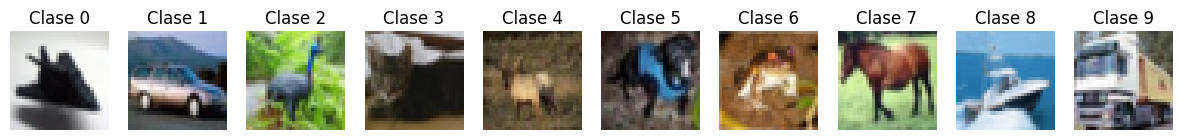

In [3]:
# Obtener una imagen representativa de cada clase
unique_classes = np.unique(y_train)
print("Etiquetas en y_train:", unique_classes)

sample_images = []

for class_label in unique_classes:
    # Encontrar el índice de la primera imagen de la clase actual
    index = np.where(y_train == class_label)[0][0]
    sample_images.append(x_train[index])

# Configurar la visualización de subtramas
fig, axes = plt.subplots(1, len(unique_classes), figsize=(15, 3))

# Mostrar una imagen de cada clase
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i])
    ax.set_title(f"Clase {unique_classes[i]}")
    ax.axis('off')

plt.show()


In [4]:
# Normalizar las imágenes a valores entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [5]:
# Convertir las etiquetas a one-hot encoding
y_trainB = to_categorical(y_train, 10)
y_testB = to_categorical(y_test, 10)

print("y_trainB --> ", y_trainB.shape)
print("y_testB  --> ", y_testB.shape)

y_trainB -->  (50000, 10)
y_testB  -->  (10000, 10)


### Definición del modelo

In [7]:
# Crear un modelo de capas secuenciales
model=Sequential()
# Agregar las capas al modelo
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation = 'tanh'))  #activation='relu'))
model.add(Dense(10, activation='softmax'))
# Imprimir un resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Configuración para entrenamiento
#model.compile(optimizer='adam',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

model.compile(optimizer=SGD(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#es = EarlyStopping(monitor='val_accuracy', patience=30, min_delta=0.0001)

#H = model.fit(x = X_train, y = Y_train, epochs=50, batch_size = 20,
#              validation_data = (X_test, Y_test),  callbacks=[es])

H=model.fit(x_train, y_trainB, epochs=50, batch_size = 200, validation_data=(x_test, y_testB))


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2319 - loss: 2.1614 - val_accuracy: 0.3250 - val_loss: 1.8552
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3386 - loss: 1.8509 - val_accuracy: 0.3757 - val_loss: 1.7603
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3777 - loss: 1.7532 - val_accuracy: 0.3889 - val_loss: 1.7262
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3933 - loss: 1.7028 - val_accuracy: 0.4034 - val_loss: 1.6567
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4125 - loss: 1.6546 - val_accuracy: 0.4254 - val_loss: 1.6336
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4295 - loss: 1.6186 - val_accuracy: 0.4153 - val_loss: 1.6504
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4360 - loss: 1.5999 - val_accuracy: 0.4285 - val_loss: 1.5972
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4455 - loss: 1.5732 - val_accuracy: 0.

In [13]:
print("épocas = %d" % len(H.history["val_accuracy"]))
#print("Epocas = %d" % es.stopped_epoch)

épocas = 50


In [14]:
# predecir la salida del modelo
y_predB = model.predict(x_train)
y_pred = np.argmax(y_predB,axis=1)


print("%% aciertos x_train : %.3f" % metrics.accuracy_score(y_train, y_pred))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
% aciertos x_train : 0.576


In [15]:
report = metrics.classification_report(y_train, y_pred)
print("Confusion matrix Training:\n%s" % report)

MM = metrics.confusion_matrix(y_train, y_pred)
print("Confusion matrix:\n%s" % MM)

Confusion matrix Training:
              precision    recall  f1-score   support

           0       0.74      0.51      0.60      5000
           1       0.84      0.55      0.66      5000
           2       0.47      0.47      0.47      5000
           3       0.39      0.50      0.44      5000
           4       0.53      0.50      0.51      5000
           5       0.45      0.55      0.50      5000
           6       0.66      0.51      0.58      5000
           7       0.61      0.70      0.65      5000
           8       0.66      0.76      0.71      5000
           9       0.62      0.72      0.66      5000

    accuracy                           0.58     50000
   macro avg       0.60      0.58      0.58     50000
weighted avg       0.60      0.58      0.58     50000

Confusion matrix:
[[2527   84  365  251  198  140   91  267  776  301]
 [ 102 2732   69  192   65  114   81  161  358 1126]
 [ 201   25 2344  536  573  502  256  356  120   87]
 [  59   32  353 2477  233 1127  264 

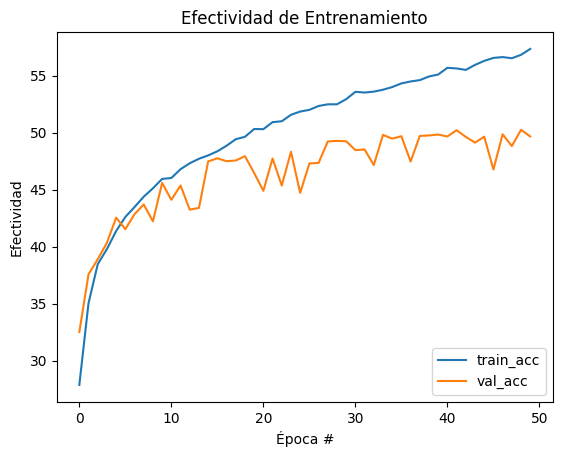

In [16]:
# dibuja accuracy del progreso del entrenamiento
accuracy = np.array(H.history["accuracy"])
val_accuracy = np.array(H.history["val_accuracy"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_acc")
plt.plot(N, 100*val_accuracy, label="val_acc")
plt.title("Efectividad de Entrenamiento")
plt.xlabel("Época #")
plt.ylabel("Efectividad")
plt.legend(loc="lower right")

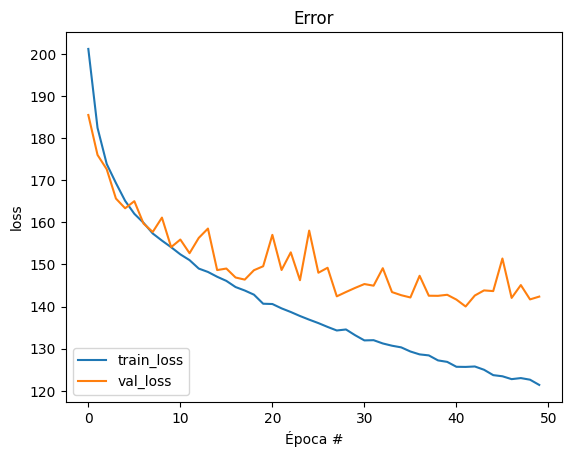

In [17]:
# dibuja accuracy del progreso del entrenamiento
accuracy = np.array(H.history["loss"])
val_accuracy = np.array(H.history["val_loss"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_loss")
plt.plot(N, 100*val_accuracy, label="val_loss")
plt.title("Error")
plt.xlabel("Época #")
plt.ylabel("loss")
plt.legend(loc="lower left")